# Machine Learning Workshop
## By Matthew Lee and Matthew Bourgeois

#### First up you'll need to install Python 3

On windows you can find the latest version here (make sure you get the 64bit version) https://www.python.org/downloads/

On linux follow this tutorial http://docs.python-guide.org/en/latest/starting/install3/linux/

On mac, this tutorial  https://docs.python.org/3/using/mac.html

## What is machine learning?
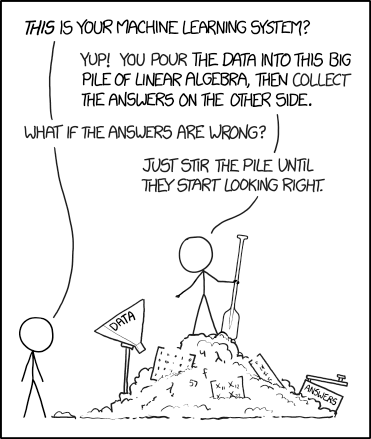

Machine learning is a subset of the Artificial Intelligence field that focuses on creating algorithms that can adjust itself and "learn" to better achieve a goal. There are many different types of algorithms in machine learning but they all fall under the following three categories: Supervised, unsupervised and reinforcement learning.

## What is supervised learning?

In this workshop we will be focusing on supervised learning where a machine learning model takes some input features (x) and maps that to some output (y). For example: we will be taking an image of a hand written digit and using the pixels as our input features (x) in an attempt to predict the expected output digits 0-9 (y). So if we enter an image of a 4 we will expect the answer 4 as our output.

What makes this a supervised problem is that we first need to train our machine learning model on what the handwritten digits look like. To do this we will have to show the model multiple examples of a hand written digit image (x) with an already labelled output (y). Our model will make an attempt at classifying the image, we then inform the model how close it was to the correct answer, and adjust its weights to be better at that in future. 

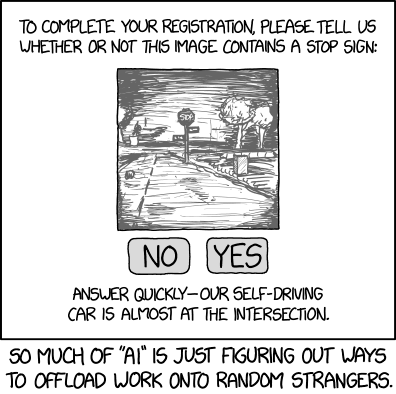

Once we've finished training our model we can then give it an example of a handwritten digit it has never seen before and, to a high degree of accuracy, it will be able to tell us what digit is in the image. This is something that was incredibly difficult to do only 5-10 years ago and yet we'll show you how to do it in this workshop in less than 50 lines of code!

## What is a neural network?
There are many different machine learning models to choose from but the most popular type currently is neural networks. Neural networks have been achieving huge amounts of success in a wide range of different fields from audio transcription, language translation, image recognition and many, many more.

Here's what your standard neural network might look like:
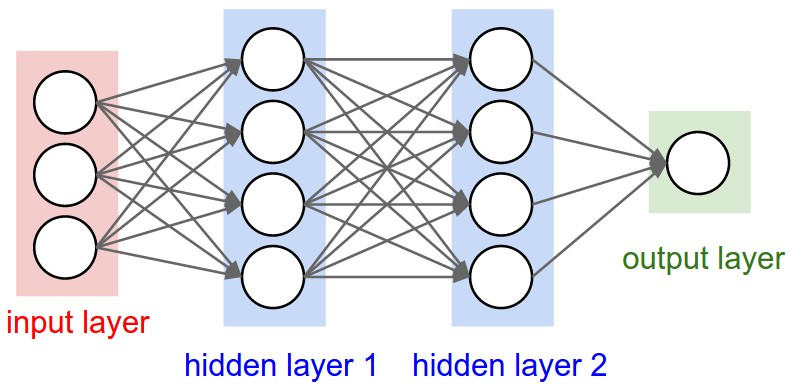

### Structure
The structure of a network consists of three parts: input layer, hidden layer(s) and output layer.

Each layer consists of a series of nodes and every node in one layer is connected to every node in the next layer by a series of weights (those arrows in the picture). 

### Process

-- This is only a summary. If the following seems confusing don't worry, we'll go into greater depths in the actual code --

Your input data (x)(the pixels of your image) is sent to the input layer. In our example every pixel of our image will have one node. The values entered into the first layer is multiplied against all the weights connecting this layer to the next. For each node of the next layer the results from that multiplication are summed together, a bias value is added, and then an **activation** function is applied. Once we have the values for every node in the next layer we can perform the exact same process to get the values for the next layer and so on. We keep doing this until we have the final values for our output layer which we can use to determine the output. This is called our **forward propagation** stage.

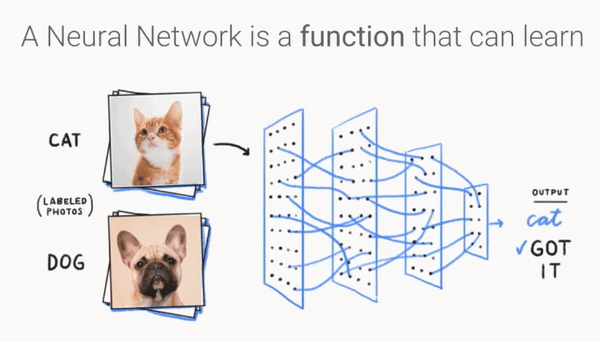

In order to adjust our network so that it learns, we compare the output against what we expected. If we sent an image of a 3 to our network, and our network says it's an 8, we calculate just how incorrect our network is and use that to go back through the network adjusting the weights using a technique called **gradient descent**. The process of using gradient descent and going back through the network is called **back propagation**.

Do this enough times and our network will adjust its weights in such a way that it will know the general shape of any digit you throw at it.

We'll be explaining how each part of the network functions in the code below.

## What is Tensorflow?

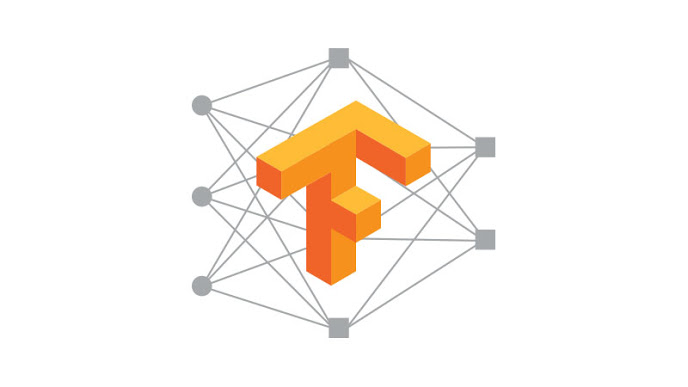

Tensorflow is an open-source machine learning framework created by Google. It specifically handles the processing and manipulation of 'tensors'. If you don't have much of a maths background don't stress. From a programming perspective tensors can be thought of as an array of any (n) dimension. For example: a greyscale image that is 28 by 28 pixels would be a tensor (or array) of shape [28, 28, 1] (That last '1' at the end is for how many colour channels an image has which in a greyscale image is just 1. This would be 3 for a coloured image). 

The 'flow' part of the name refers to how these tensors are manipulated. Tensorflow creates a **computation graph** where you set up each calculation you want to perform, enter your data and then run the graph in a session.

So I guess you could say that Tensorflow handles how tensors... flow.

We'll talk more about this in a bit.

## MNIST Dataset
This dataset contains the following:

**Training set**: 60,000 labelled images

**Testing set**: 10,000 labelled images

**Image dimensions**: 28 x 28 pixels (greyscale)

**Labels**: Digits from 0-9

**Pixel Range**: 0 to 1 (0 = white, 1 = black, 0.5 = grey)

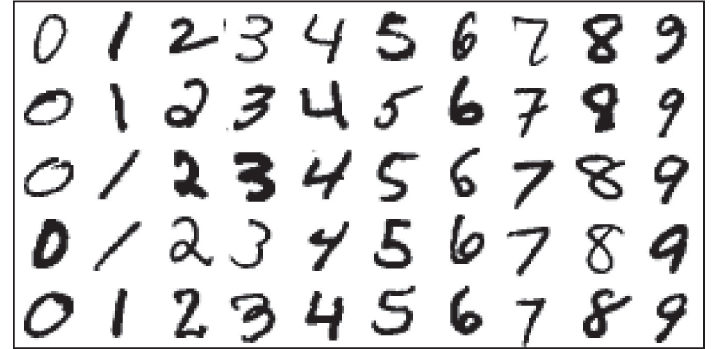
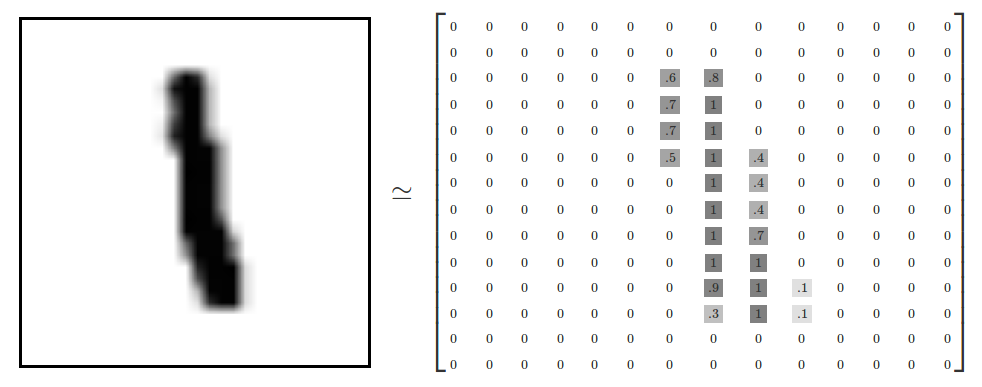

## Let's get into the code!

The Tensorflow team has been kind enough to provide us with the formatted MNIST dataset. The code below downloads (or extracts if already downloaded) all of the images and stores them in the folder 'MNIST_data'.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# This may take a few minutes...
mnist = input_data.read_data_sets("data/digits", one_hot=True)

### Hyperparameters
These are the variables that you can alter to change the way your network functions.

**learning_rate**
During the training phase your network adjusts its weights. The learning rate determines how much they should change. A higher learning rate means the network will wildly alter itself after a batch of training samples where as a smaller learning rate will mean that it will only nudge itself slightly after each batch.

**epochs**
This determines how many times you want your network to go through the **entire** training set.

**batch_size**
This is how many training examples you want to process at a time so you don't have to store the entire training set in memory. There are some <a href="https://datascience.stackexchange.com/questions/16807/why-mini-batch-size-is-better-than-one-single-batch-with-all-training-data">mathematical reasons for this as well</a>

In [ ]:
learning_rate = 0.002
epochs = 10
batch_size = 124

### Network Parameters
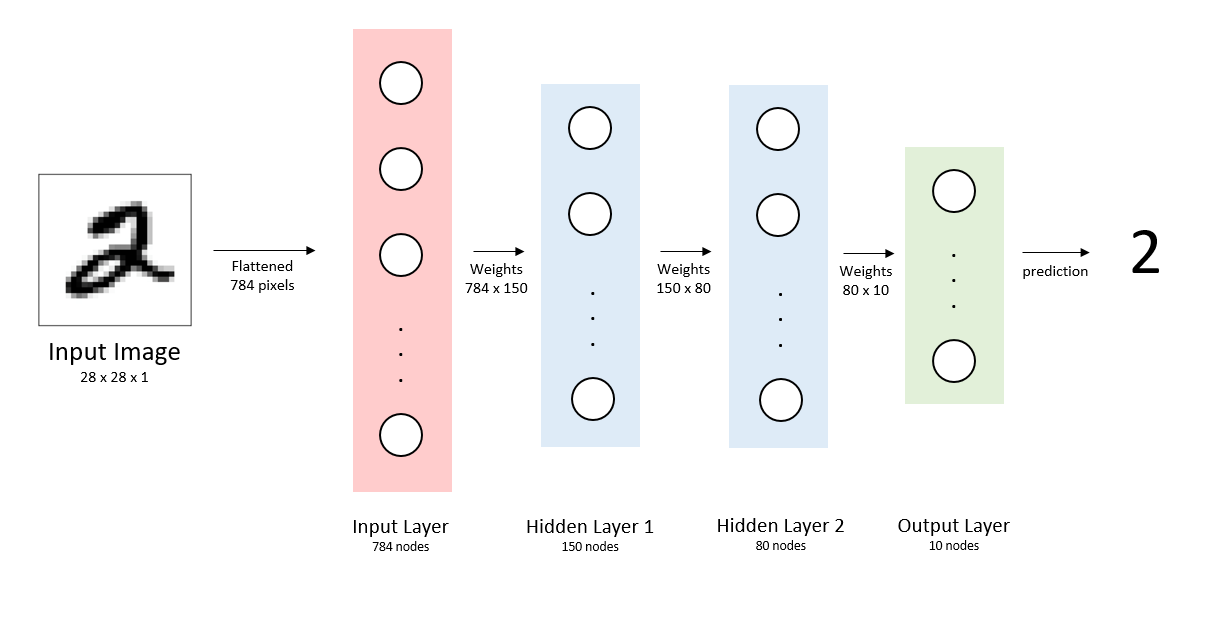

Here we define the variables needed to construct the above neural network. Our network is three layers (you don't count the input layer). You may have heard of the term 'deep learning' at some point, all this refers to is a neural network with more than one hidden layer.

#### What is a hidden layer?
The problem that we're trying to solve is quite complex. From a computers perspective, all it sees is a bunch of numbers in a matrix (ahem, 'tensor') and it somehow has to interpret the meaning of those numbers to produce a useful output. Not to mention that no two people write the same number in the same way!

The hidden layers add extra layers of abstraction in order to pull out certain elements from the matrix that may be useful in determining which digit is in the image. For instance, the first layer *might* find edges and curves, the second layer *might* find circles and lines and so on until it uses these features to create a prediction.
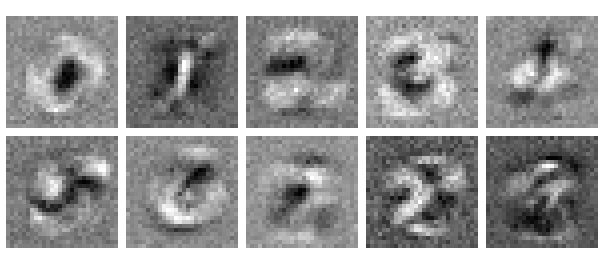

I said *might* before because the network learns itself what features are relevant. The above image is an output of what one layer of one neural network saw when trained on the MNIST dataset. It looks like a jumbled mess for the most part but you can see it is highlighting areas of interest to use later on. For more reading on this, <a href="https://ml4a.github.io/ml4a/looking_inside_neural_nets/">check out this great article</a>.

#### Output Layer
The output layer only has 10 nodes in it because that's exactly how many digits we're trying to predict (0-9). Once we perform our forward pass, we take the largest value from the output and use that for our prediction. So if the fourth node is the largest, we determine the network predicted a 3 (we start counting from 0 in computer land)

In [ ]:
input_nodes = 784 # 28 by 28 pixel image flattened to 784 pixels
hidden_1_nodes = 150
hidden_2_nodes = 80
output_nodes = 10 # Number of classes (0-9)

## Setting up Tensorflow variables

Tensorflow has two key processes:
- Setting up the computation graph
- Running the computation graph

This is best explained with an example:

In [ ]:
# Let's add two numbers using the computation graph for the sake of example
node1 = tf.constant(3.0)
node2 = tf.constant(4.0) 

multiply = node1 * node2

divide = node2 / node1

add = multiply + divide

print("Node 1:", node1)
print("Node 2:", node2)
print("Multiply:", multiply)
print("Divide:", divide)
print("Add:", add)

### What's this?
In the above code we created two constant values 3.0 and 4.0. So you would expect that when we printed them out we would get those numbers back? Right?

Not right.

Because what we're doing here is creating 'nodes' in our **computation graph**. Here's what we just created:

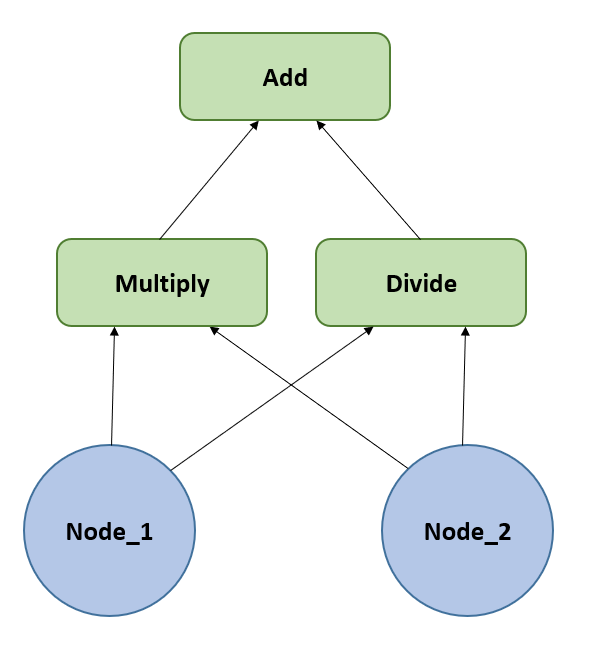

Every value (node1, node2) and operation (plus, minus, divide, multiply) are stored as a node with connections to other nodes. In order to get the result we need to **run** these nodes as part of a **session**.

In [ ]:
sess = tf.Session() # This creates our session to run the computation graph

print("Node 1 and 2:", sess.run([node1, node2]))
print("Multiply:", sess.run(multiply))
print("Divide:", sess.run(divide))
print("Add:", sess.run(add))

sess.close()

### Why do we do this?
Neural networks are structures with a lot of different values and operations. Take another look at the image of the network we're creating. All those nodes as part of each layer are individual values in a matrix and we're going to need to run a lot of calculations on them. 

By creating a graph first Tensorflow can prepare for the operations and optimize it as much as possible. This makes everything lightening fast which is definitely needed in machine learning.

## Setting up our layers
Let's talk about placeholders, variables and constants.

**placeholders**: We create a computation graph first but we haven't given the network any values yet. We need a variable that can be used as a *placeholder* until we pass it the values. 

Let's say we have the following equation: 

2x + 3 = ?

What is x? It's a placeholder for a value. The same is true for the placeholders below where x will be the images that we pass it and y will be what we expect the output to be. But until we start training and passing our network these values we just need a variable to enter into our computation graph

**variable**: These are alterable values that we pre-define. In this case we are defining the weights and biases of our network (more on this later). Variables are *variable*; they can be changed later on.

**constants**: we used them above in our example. These are pre-defined values that *can't* be changed later on.

In [ ]:
x = tf.placeholder('float', [None, input_nodes]) # Where our images will go
y = tf.placeholder('float', [None, output_nodes]) # Where our labels will go

hlw_1 = tf.Variable(tf.random_normal([input_nodes, hidden_1_nodes])) # The weights of the first hidden layer
hlb_1 = tf.Variable(tf.random_normal([hidden_1_nodes])) # The biases of the first hidden layer

hlw_2 = tf.Variable(tf.random_normal([hidden_1_nodes, hidden_2_nodes])) # The weights of the second hidden layer
hlb_2 = tf.Variable(tf.random_normal([hidden_2_nodes])) # The biases of the second hidden layer

outw = tf.Variable(tf.random_normal([hidden_2_nodes, output_nodes])) # The weights of the output layer
outb = tf.Variable(tf.random_normal([output_nodes])) # The biases of the output layer

## Forward Propagation
Here's the function we use to make a prediction!

A neural network has two parts: forward propagation and backward propagation. The forward part is used to calculate what the output is. Here's an example of how a single neuron works in our network:

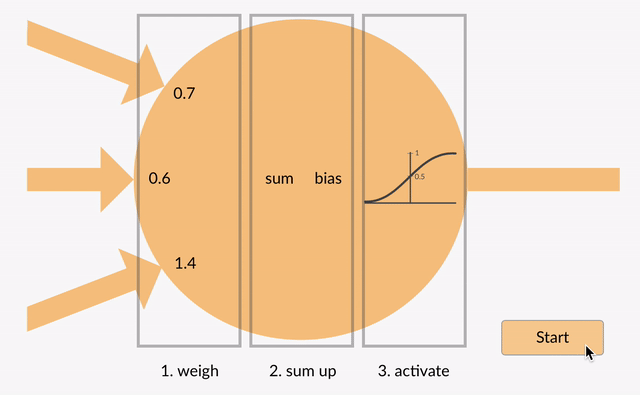

This can be broken down into the following steps:
- Multiply the inputs of the last layer against the weights of this layer
- Sum the result together
- Add a bias value
- Apply an activation function
- Use as the input to the next layer

**Multiply input against weights**

You may assume that in order to multiply every input of the last layer to every weight of the current layer that we would need at least 2 for loops. This is really ineffecient! Instead we can just multiply our matrices (tensors) together.

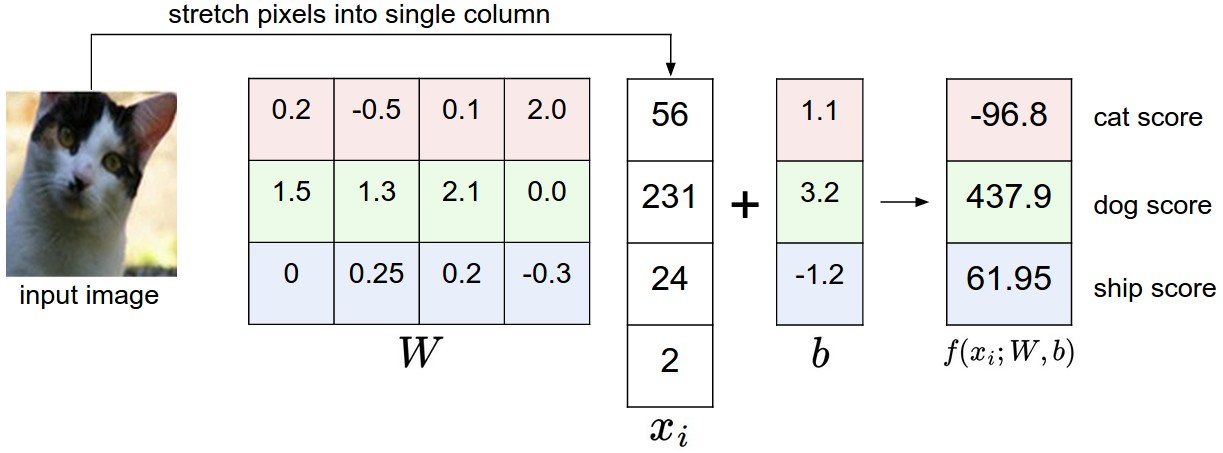

**Sum the results**

Add all the numbers together

**Add a bias value**

A bias is used to shift the output from the activation function (the next step). The explanations for why this is needed requires more knowledge of the math behind neural networks than this workshop is going into. However if you're curious there are some great explanations <a href="https://stackoverflow.com/questions/2480650/role-of-bias-in-neural-networks">here</a>

**Apply an activation function**

What you've computed so far is a **linear equation** which would be great if our data was linear in nature such as house prices vs square feet
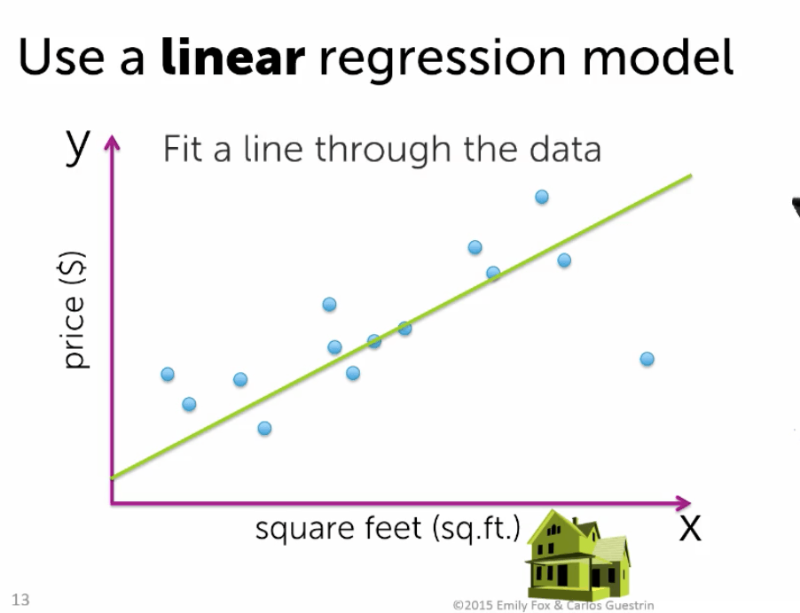

This kind of linear prediction might work for simple problems, although the wonder of neural networks is that they can make sense of vastly non-linear, confusing and noisy data
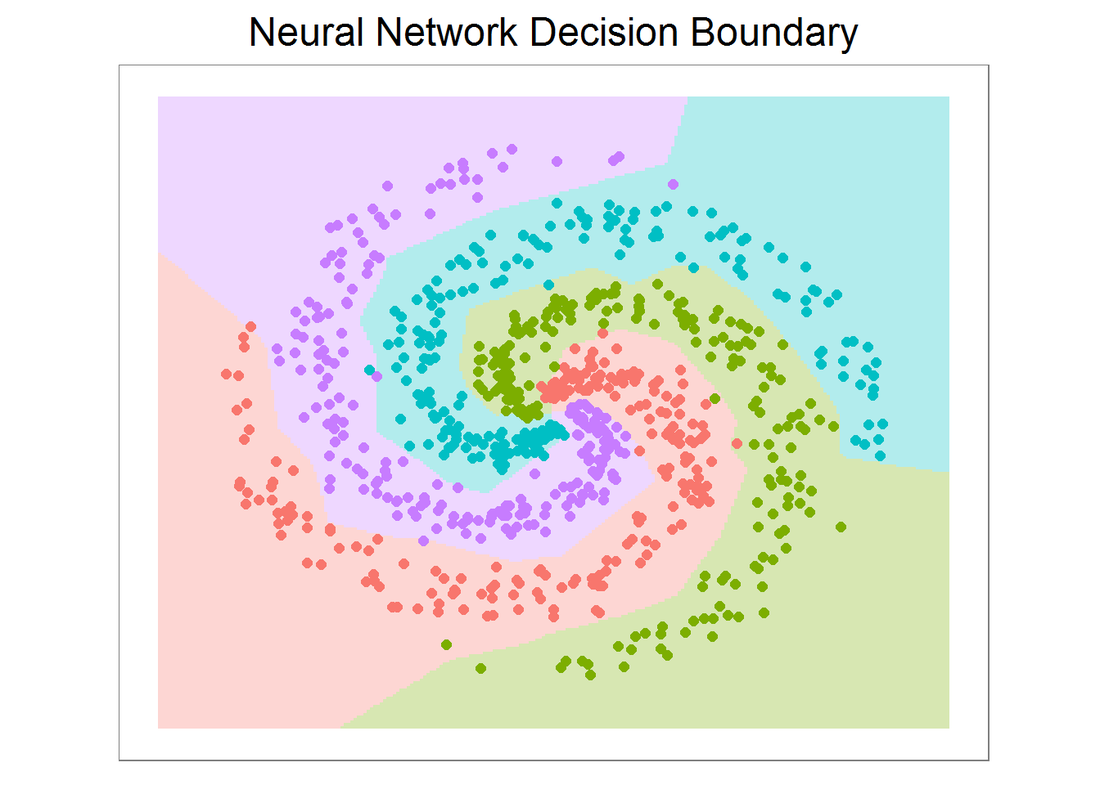

Try drawing a line through that to accurately seperate it. You can't. You're going to need to add some non-linearity to your neural network!

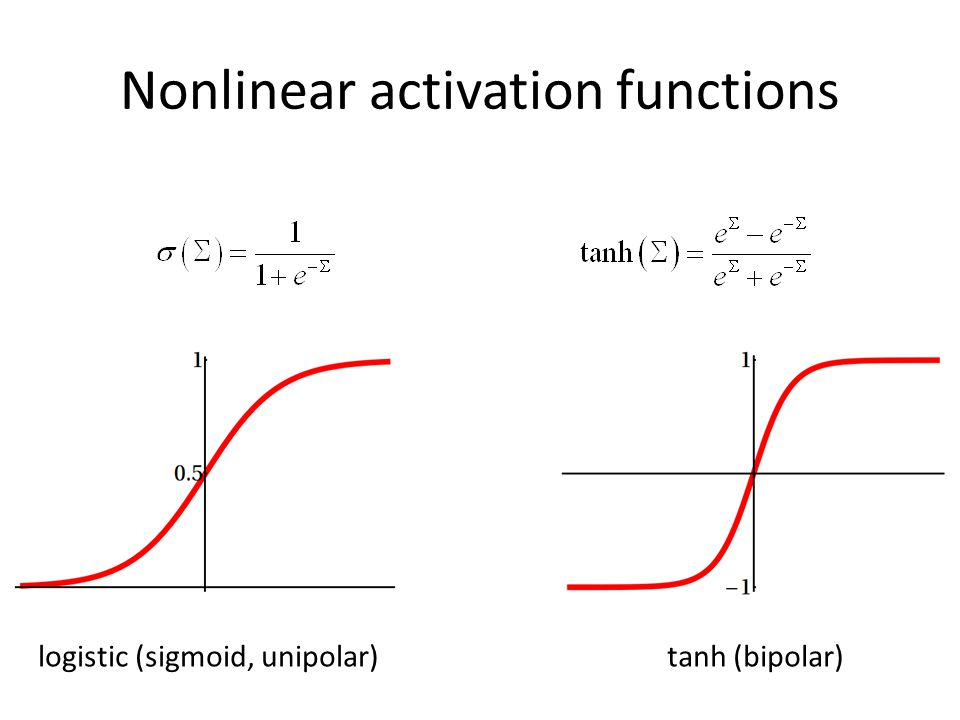

These are two of the most popular activation functions used. In this example we use the sigmoid activation function which squashes all values between a range of 0 to 1. You'll notice that if you give this function a large number it will output something close to 1, where as if we enter a small number you'll recieve a number close to 0. As an added benifit it is non-linear! Which means our outputs from our network will also be non-linear! Perfect for those complex problems. For a more detailed explanation have a read of <a href="https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0">this</a>

### Alright, that was a lot to cover
That all may seem overwhelming. It certainly was overwhelming when I was first learning it. 

So it's fair to say that it will take a lot of work to implement it...

In [ ]:
def forward_propagation(x):
    hlout_1 = tf.nn.sigmoid(tf.matmul(x, hlw_1) + hlb_1) # input multiplied by hidden layer 1 weights. Add bias. Apply sigmoid
    hlout_2 = tf.nn.sigmoid(tf.matmul(hlout_1, hlw_2) + hlb_2) # hidden layer 1 output multiplied by hidden layer 2 weights. Add bias. Apply sigmoid
    output = tf.matmul(hlout_2, outw) + outb # hidden layer 2 output multiplied by output layer weights. add bias. DON'T add sigmoid
    return output

I lied. It's only 5 lines of code to implement it.

## Backward propagation

There's a lot to be said on the topic of backwards propagation. Fortunately Tensorflow essentially does all of it for us so in this workshop we're only going to be covering it at a high level. If you'd like a more in-depth explanation, take a look at <a href="https://brilliant.org/wiki/backpropagation/">this</a> (warning: math)

Let's talk about what backpropagation is trying to accomplish: We have a problem where we want to give our neural network a picture of a handwritten digit and it will tell us what number is in that picture using a bunch of weights.

Backpropagation is how we alter those weights in order to make our predictions better. We do this by first calculating exactly how wrong our network is by comparing our output (y_) to what we expect (y). This is called an error or loss function and we can use these values to **back propagate** through the network in order to adjust the weights and *reduce* the value of this error function.

### How do the weights know which way to move in order to lower the error function?
Let's focus on one node for now. If we were to graph our weight it might look like this:


<center>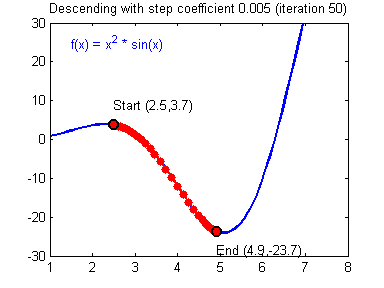
*The y axis is the amount of error and the x axis is the weights value*</center>

Looking at the graph there is a valley where the error is at its lowest. This is called the global optima and is where we want our weight value to be. The problem is we've created our weights initially to be random, so how do we know which way to adjust our weights in order to get into that global optimia?

There's a technique called gradient descent that is used to find the lowest point of a function such as this. It's called gradient descent because we first find the slope (i.e gradient) of our current location, and then step downwards on that slope (descent). The learning rate we've defined earlier determines how far we step in that direction. You can see above that the red line smoothly steps downward until finally resting at the bottom. This is because our learning rate isn't so big that it bounces around like so:

<center>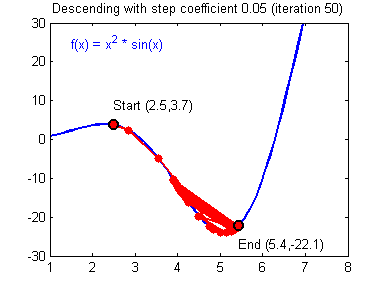
*Your learning rate is too big!*</center>

So we find how wrong our network is by calculating the difference between our output and the expected. Then we use that to go back through our network and adjust each neuron using gradient descent. 

Like I said before though, Tensorflow has this handled:

In [ ]:
def backward_propagation(y_, y, learning_rate):
    cost = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits(logits=y_, labels=y)) #Error/loss function. Cost is the total error over the batch
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) #Adam optimizer is a type of gradient descent. We want it to use the learning rate and minimize that cost
    return optimizer, cost

Cost is the total error over the batch and is a good indicator of how our network is doing after each epoch.

## Calculate Accuracy
We have our outputs. We have our expected values. Let's see how many match. 

In [ ]:
def calculate_accuracy(y_, y):
    correct = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1)) # argmax finds the index of the largest value in a tensor. So we're comparing the two using tf.equal
    accuracy = tf.reduce_mean(tf.cast(correct, 'float')) # We've got a tensor of true and false statements now. Let's find the average amount
    return accuracy, correct

Call all these functions to add them to the computation graph

In [ ]:
y_ = forward_propagation(x)
optimizer, cost = backward_propagation(y_, y, learning_rate)
accuracy = calculate_accuracy(y_, y)

Start our session

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

## Time to train!
Let's put it all together!

The first for loop goes over our training set a number of times matching the *epochs* value we defined earlier

For each epoch we want to go over the training set in batches.

Run our optimizer which runs our network and backpropagates through the network. Remember our placeholders? Now we can give them values using 'feed_dict'.

After going over the training set we can calculate an accuracy of the training set.

In [ ]:
cost_per_epoch = [] 
accuracy_per_epoch = []

# Loop over the dataset 'epochs' amount of times
for epoch in range(epochs):
    epoch_cost = 0
    
    # Go through the dataset in batches
    for _ in range(int(mnist.train.num_examples/batch_size)):
        train_x, train_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict={x: train_x, y: train_y}) # Run our forward prop and backward prop over this batch of training data
        epoch_cost += c
    
    # Test the accuracy of our model against the training set
    epoch_accuracy, _ = sess.run(accuracy, feed_dict={x: mnist.train.images, y: mnist.train.labels}) # Pass all the labels through to calculate accuracy
    print('Epoch', epoch + 1, 'completed out of', epochs, '\ncost:', epoch_cost, '\ntraining accuracy:', epoch_accuracy, '\n')
    
    # Store the results of this epoch so we can make nice graphs later
    cost_per_epoch.append(epoch_cost)
    accuracy_per_epoch.append(epoch_accuracy) 

### 96>% accuracy! Want to see how it did over time?

In [ ]:
plt.plot(cost_per_epoch)
plt.show()
print("Cost each iteration")
plt.plot(accuracy_per_epoch)
plt.show()
print("Accuracy each iteration")

As the cost goes down in our network its accuracy rises. This is what we'd expect from our network. If this doesn't happen then there is something wrong with your network somewhere

## Test against the test data
We got the accuracy of our network against our training data but there's a problem with that. The network has already seen this data and so it knows what to expect! What would happen if we gave it completely new, unseen data?

Good question. Let's try it out with our test set and see what our results are:

In [ ]:
(test_accuracy, test_correct_list), outputs = sess.run([accuracy, y_], feed_dict={x: mnist.test.images, y: mnist.test.labels})
print("training accuracy:", accuracy_per_epoch[-1])
print("testing accuracy:", test_accuracy)

A lower accuracy on our test set but not by all that much. Keep in mind our network has never seen the values of our test network so this is actually really good. This is the number you judge your network by.

## What did we get wrong?
It can be interesting to see what we actually got wrong. The code below prints out an example of what we're failing at.

In [ ]:
example_index = 100

failed_indexes = [index for index, value in enumerate(test_correct_list) if value == False]

print("Amount of failed results", len(failed_indexes), "out of a total", len(mnist.test.images))

image = mnist.test.images[failed_indexes[example_index]]
label = np.argmax(mnist.test.labels[failed_indexes[example_index]], axis=0)
output = np.argmax(outputs[failed_indexes[example_index]], axis=0)

plt.imshow(image.reshape([28, 28]), cmap='gray_r')
plt.show()
print("Expected value:", label)
print("Output of network:", output)

It gets some obvious ones wrong but keep in mind it got over 90% right! There's a technique that involves adding **convolutional** layers to your network to get upwards of 98% accuracy. <a href="https://www.tensorflow.org/get_started/mnist/pros">It's worth looking into</a>

## Fashion Diva
That was a lot to cover. There are a lot of moving parts and things to think about and graphs and such. You're not expected to know everything all at once. The best way to learn is by doing! 

So we've got a challenge:
Given a set of images that contain different clothing items, can you create a neural network that can classify what type of clothing is in the image?

You can find the jupyter notebook in this same folder (MNIST_fashion_challenge) with some instructions. Remember to break the problem down and use this notebook as a guide. 

Good luck!